<a href="https://colab.research.google.com/github/devyaniii12/ML-LAB_3-4-5/blob/main/ML_COMBINED_3_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('//content/framingham.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/framingham.csv')

In [ ]:
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
def null_clear(df,columns):
    for col in columns:
        null_counter=df[col].isnull().sum()
        if null_counter>0:
             df[col]=df[col].fillna(df[col].mean())
        else:
             print(f"values not null in {col}")

column_list=list(df.columns)
null_clear(df,column_list)

values not null in male
values not null in age
values not null in currentSmoker
values not null in prevalentStroke
values not null in prevalentHyp
values not null in diabetes
values not null in sysBP
values not null in diaBP
values not null in TenYearCHD


In [ ]:
def outlier_detector(df, features):
    outlier_indices = []

    for col in features:
        # Quartile 1 (25th percentile)
        Q1 = np.percentile(df[col], 25)
        # Quartile 3 (75th percentile)
        Q3 = np.percentile(df[col], 75)
        # Interquartile Range (IQR)
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5

        # Detect outliers and their indices
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    # Count the occurrence of each index
        outlier_indices = Counter(outlier_indices)

    # Indices that appear more than twice (as outliers in multiple columns)
        multiple_outliers = [i for i, v in outlier_indices.items() if v > 2]

        return multiple_outliers


In [ ]:
df = df.drop(outlier_detector(df,column_list),axis = 0).reset_index(drop = True)


In [ ]:
x=df.drop("TenYearCHD",axis=1).values
y=df["TenYearCHD"].values

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
logr=LogisticRegression()
logr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=logr.predict(X_test)
print(f"real values{Y_test},model prediction {y_pred}")
confusion_matrix(Y_test,y_pred)

real values[0 0 0 ... 1 0 0],model prediction [0 0 0 ... 0 0 0]


array([[1075,    9],
       [ 168,   20]])

In [ ]:
accuracy_score(Y_test,y_pred)

0.8608490566037735

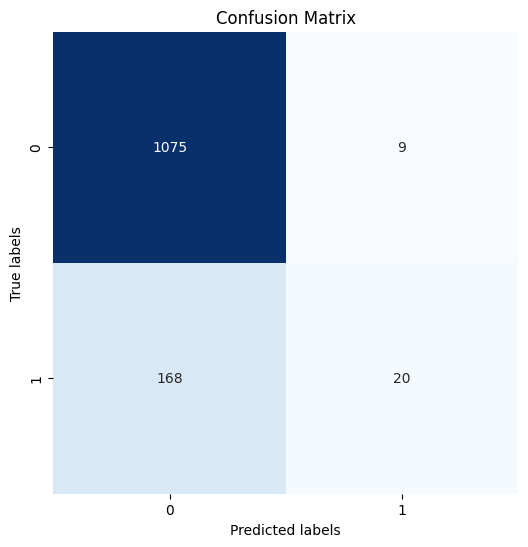

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

f1 = f1_score(Y_test, y_pred)

print(f"Accuracy according to Logistic Regression : {accuracy:.4f}")
print(f"Precision according to Logistic Regression: {precision:.4f}")
print(f"Recall according to Logistic Regression : {recall:.4f}")
print(f"F1-Score according to Logistic Regression : {f1:.4f}")


Accuracy according to Logistic Regression : 0.8608
Precision according to Logistic Regression: 0.6897
Recall according to Logistic Regression : 0.1064
F1-Score according to Logistic Regression : 0.1843


Real values: [0 0 0 ... 1 0 0]
Model predictions: [0 0 0 ... 0 0 0]


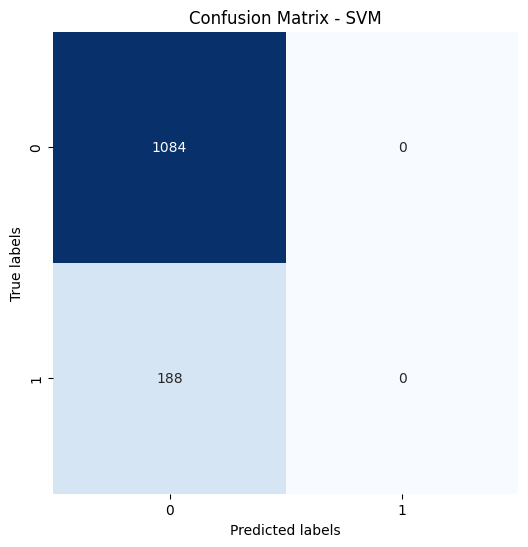

Accuracy (SVM): 0.8522
Precision (SVM): 0.0000
Recall (SVM): 0.0000
F1-Score (SVM): 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, Y_train)

# Predict the results on the test set
y_pred_svm = svm_model.predict(X_test)

# Print real vs predicted values (optional for debugging)
print(f"Real values: {Y_test}")
print(f"Model predictions: {y_pred_svm}")

# Calculate the confusion matrix
cm_svm = confusion_matrix(Y_test, y_pred_svm)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(6,6))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# Calculate evaluation metrics
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
precision_svm = precision_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test, y_pred_svm)
f1_svm = f1_score(Y_test, y_pred_svm)

# Display evaluation metrics
print(f"Accuracy (SVM): {accuracy_svm:.4f}")
print(f"Precision (SVM): {precision_svm:.4f}")
print(f"Recall (SVM): {recall_svm:.4f}")
print(f"F1-Score (SVM): {f1_svm:.4f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

<ipython-input-27-3a43951475e1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


In [ ]:

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data['Species'], test_size=0.3) #Fixed column names to match the dataset

In [ ]:

X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
35,5.0,3.2,1.2,0.2
24,4.8,3.4,1.9,0.2
65,6.7,3.1,4.4,1.4
131,7.9,3.8,6.4,2.0
1,4.9,3.0,1.4,0.2
...,...,...,...,...
8,4.4,2.9,1.4,0.2
5,5.4,3.9,1.7,0.4
63,6.1,2.9,4.7,1.4
18,5.7,3.8,1.7,0.3


In [ ]:
y_train

,Species
35,1
24,1
65,2
131,3
1,1
...,...
8,1
5,1
63,2
18,1


In [ ]:

from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=120)
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=120)

In [ ]:

mymodel.predict(X_test)

array([2, 3, 1, 2, 2, 3, 1, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 3, 1, 2, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3, 2, 3, 2, 1,
       2])

In [ ]:
mymodel.score(X_test, y_test)

1.0

In [ ]:
predicted_output = mymodel.predict(X_test)
predicted_output

array([2, 3, 1, 2, 2, 3, 1, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 3, 1, 2, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3, 2, 3, 2, 1,
       2])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

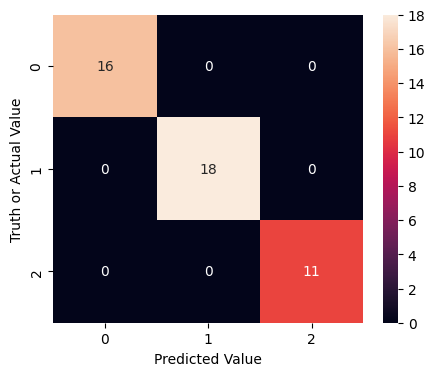

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'y_test' and 'predicted_output' are defined from previous cells
classification_report_result = classification_report(y_test, predicted_output)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.8608
Precision: 0.6897
Recall: 0.1064
F1-Score: 0.1843

Confusion Matrix:
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the Iris dataset
df = pd.read_csv('/content/Iris.csv')

# Drop unnecessary columns and prepare features (X) and target (y)
X = df.drop(['Id', 'Species'], axis=1).values  # Drop 'Id' and 'Species'
y = df['Species'].values  # Target variable

# Encode target labels (Species) to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SVM model
svm_model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc., if needed
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report_result)


Accuracy: 0.9778
Precision: 0.9794
Recall: 0.9778
F1-Score: 0.9777

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the Iris dataset
df = pd.read_csv('/content/Iris.csv')

# Drop unnecessary columns and prepare features (X) and target (y)
X = df.drop(['Id', 'Species'], axis=1).values  # Drop 'Id' and 'Species'
y = df['Species'].values  # Target variable

# Encode target labels (Species) to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report_result)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('/content/Iris.csv')

# Drop unnecessary columns and prepare features (X) and target (y)
X = df.drop(['Id', 'Species'], axis=1).values  # Drop 'Id' and 'Species'
y = df['Species'].values  # Target variable

# Encode target labels (Species) to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate and print metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    # Output results
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", classification_report_result)
    print("=" * 50)

# Logistic Regression
logistic_model = LogisticRegression()
evaluate_model(logistic_model, X_train, y_train, X_test, y_test, "Logistic Regression")

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')  # You can change the kernel if needed
evaluate_model(svm_model, X_train, y_train, X_test, y_test, "Support Vector Machine")

# Decision Tree
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")


Logistic Regression Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Support Vector Machine Results:
Accuracy: 0.9778
Precision: 0.9794
Recall: 0.9778
F1-Score: 0.9777

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       ac

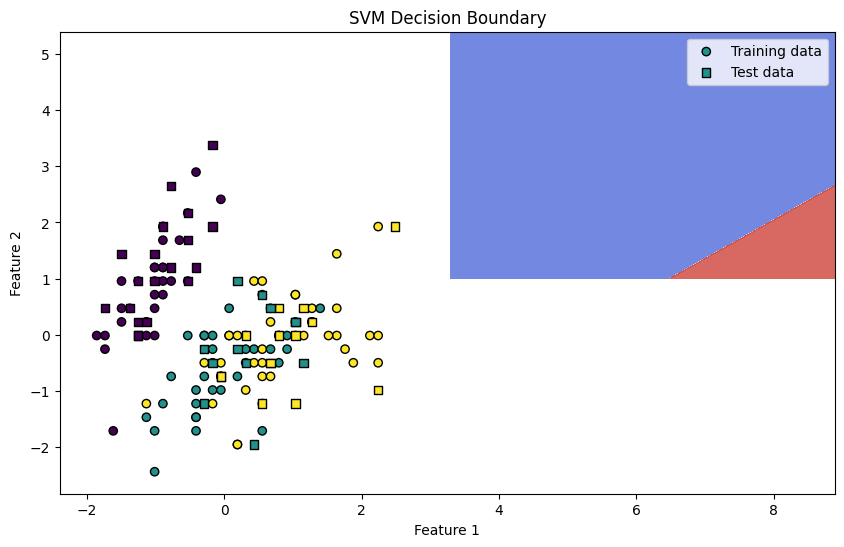

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd #Import pandas

# Load the Iris dataset
df = pd.read_csv('/content/Iris.csv')  # Replace with the correct path
X = df.drop(['Id', 'Species'], axis=1).values
y = df['Species'].values

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Create a mesh to plot the decision boundary
# Use all 4 features for the meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Create feature combinations for prediction
# Use the same scaling as applied to the training data
mesh_data = np.c_[xx.ravel(), yy.ravel()]
mesh_data = np.hstack((mesh_data, np.zeros((mesh_data.shape[0], 2))))  # Add zero values for the remaining features
mesh_data = scaler.transform(mesh_data)

# Predict class for each point in the mesh
Z = svm_model.predict(mesh_data)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test data')
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()